In [2]:
# https://colab.research.google.com/drive/1jOp-jinUL3NBLQOjjnTbbQheICaEtFrk?usp=sharing
from matplotlib.font_manager import FontProperties as fp
import pandas as pd
import numpy as np
import statistics as st
import math as m
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

## **Pandas class**


load data

In [3]:
import pandas as pd
# load data and add missing column names
col = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 
       'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 
       'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 
       'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']
url = "https://tinyurl.com/bdz8m95b"
df_flags = pd.read_csv(url, names = col)
print(df_flags.head(10))

              name  landmass  zone  area  population  language  religion  \
0      Afghanistan         5     1   648          16        10         2   
1          Albania         3     1    29           3         6         6   
2          Algeria         4     1  2388          20         8         2   
3   American-Samoa         6     3     0           0         1         1   
4          Andorra         3     1     0           0         6         0   
5           Angola         4     2  1247           7        10         5   
6         Anguilla         1     4     0           0         1         1   
7  Antigua-Barbuda         1     4     0           0         1         1   
8        Argentina         2     3  2777          28         2         0   
9        Argentine         2     3  2777          28         2         0   

   bars  stripes  colours  ...  saltires  quarters  sunstars  crescent  \
0     0        3        5  ...         0         0         1         0   
1     0        

inspect data

In [4]:
# inspect data
# number of rows
len(df_flags.index)

194

In [5]:
# number of rows, columns
df_flags.shape

(194, 30)

In [6]:
# general info of the dataframe
df_flags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [7]:
# any nulls or missing values in stripes column?
df_flags.stripes.info()

<class 'pandas.core.series.Series'>
RangeIndex: 194 entries, 0 to 193
Series name: stripes
Non-Null Count  Dtype
--------------  -----
194 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [8]:
df_flags.isnull()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# get simple descriptive stats eg mean
df_flags.area.describe()

count      194.000000
mean       700.046392
std       2170.927932
min          0.000000
25%          9.000000
50%        111.000000
75%        471.250000
max      22402.000000
Name: area, dtype: float64

In [10]:
# to go into specific parameter
df_flags.area.std()

2170.927931995799

In [11]:
landmass_labels = {
    1: 'N.America',
    2: 'S.America',
    3: 'Europe',
    4: 'Africa',
    5: 'Asia',
    6: 'Oceania'
}
df_flags['landmass_name'] = df_flags['landmass'].map(landmass_labels)
print(df_flags.head(5))

             name  landmass  zone  area  population  language  religion  bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   stripes  colours  ...  quarters  sunstars  crescent  triangle  icon  \
0        3        5  ...         0         1         0         0     1   
1        0        3  ...         0         1         0         0     0   
2        0        3  ...         0         1         1         0     0   
3        0        5  ...         0         0         0         1     1   
4        0        3  ...         0         0         0         0     0   

   animate  text topleft  botright  landmass_name  
0        0     0

In [12]:
# Ori's solutions
# df_flags['landmass_name'].value_counts(normalize=True)
df_flags_percent = df_flags['landmass_name'].value_counts(normalize=True)
oceania_percent = df_flags_percent.loc['Oceania'] * 100
print(f"{oceania_percent:.2f}% of flags are from Oceania")

10.31% of flags are from Oceania


In [13]:
# show landmass vs respective share of counts
title = 'T1: Share % of Counts of Landmass Names'

# works in VS Code
s = df_flags['landmass_name'].value_counts(normalize=True)*100
df = s.apply(lambda x: f"{x:.2f}%").to_frame()
print(f"{title}\n{df.to_string(header=False)}")

T1: Share % of Counts of Landmass Names
Africa     26.80%
Asia       20.10%
Europe     18.04%
N.America  15.98%
Oceania    10.31%
S.America   8.76%


In [14]:
# alternative to  above but only works in Jupyter. Won't display anything if use print() to wrap
# value_counts(normalize=True) to calc numeric percentage
df_raw_output = (df_flags['landmass_name'].value_counts(normalize=True)*100).apply(lambda x: f"{x:.2f}%").to_frame()
styles = [{'selector': 'caption', 'props': [('text-align', 'left')]}, 
 {'selector': 'th:first-child', 'props': [('text-align', 'left')]}, 
  {'selector': 'td', 'props': [('text-align', 'left')]}]
df_raw_output.style.set_table_styles(styles).set_caption(title)

,landmass_name
Africa,26.80%
Asia,20.10%
Europe,18.04%
N.America,15.98%
Oceania,10.31%
S.America,8.76%


In [15]:
# Ori's solution
# df_flags.groupby(['landmass_name', 'mainhue']).size()
# crude method to find which landmass has orange as mainhue
df_lm_mainhue = df_flags.groupby(['landmass_name', 'mainhue']).size().reset_index(name='counts')
df_lm_mainhue

,landmass_name,mainhue,counts
0,Africa,black,1
1,Africa,blue,6
2,Africa,gold,9
3,Africa,green,17
4,Africa,orange,2
5,Africa,red,16
6,Africa,white,1
7,Asia,black,1
8,Asia,blue,2
9,Asia,brown,2


In [16]:
# a more flexible function method for above
def unique_landmass_mainhue(color):
    df_lm1 = df_flags.groupby(['landmass_name', 'mainhue']).size().reset_index(name='counts')
    print(df_lm1[df_lm1['mainhue'] == color]['landmass_name'].unique())
unique_landmass_mainhue('orange')

['Africa' 'Asia']


In [17]:
# simplest solution for above
def mainhue_flag(color):
  print ((df_flags[df_flags['mainhue'] == color])['landmass_name'].unique())
mainhue_flag('orange')

['Asia' 'Africa']


In [18]:
# use pivot table method to solve the above
df_flags.pivot_table(values = 'name', index='landmass_name', columns = 'mainhue', aggfunc = 'count')

mainhue,black,blue,brown,gold,green,orange,red,white
landmass_name,,,,,,,,
Africa,1.0,6.0,NaN,9.0,17.0,2.0,16.0,1.0
Asia,1.0,2.0,2.0,2.0,6.0,2.0,20.0,4.0
Europe,1.0,3.0,NaN,4.0,NaN,NaN,17.0,10.0
N.America,1.0,15.0,NaN,1.0,5.0,NaN,4.0,5.0
Oceania,1.0,11.0,NaN,1.0,1.0,NaN,6.0,NaN
S.America,NaN,3.0,NaN,2.0,2.0,NaN,8.0,2.0


In [19]:
# simpler solution to above pivot method
def pivot_mainhue(color):
    pivot = df_flags.pivot_table(values='name', index='landmass_name', columns='mainhue', aggfunc='count')
    print(pivot[pivot[color] > 0].index.tolist()) # index in this case is the column of landmass
pivot_mainhue('orange')

['Africa', 'Asia']


## **Visualization (Prep)**

In [20]:
# Get the aggregated data for counts of countries by landmass_name
landmass_hue_agg = df_flags.pivot_table(values='name', index='landmass_name', columns='mainhue', aggfunc='count', fill_value=0)
landmass_hue_agg

mainhue,black,blue,brown,gold,green,orange,red,white
landmass_name,,,,,,,,
Africa,1,6,0,9,17,2,16,1
Asia,1,2,2,2,6,2,20,4
Europe,1,3,0,4,0,0,17,10
N.America,1,15,0,1,5,0,4,5
Oceania,1,11,0,1,1,0,6,0
S.America,0,3,0,2,2,0,8,2


In [21]:
# re-order the columns
# create a list that shows the desired order of the columns
ordered_colors = ['red', 'orange', 'gold', 'green', 'blue', 'black', 'brown', 'white']
# can do without assigning the re-ordered columns data frame to a new data frame, but  I just want to keep a lineage of changes 
# hence assigning the ordered data frame as a new one  
df_lmo = landmass_hue_agg[ordered_colors]
df_lmo

mainhue,red,orange,gold,green,blue,black,brown,white
landmass_name,,,,,,,,
Africa,16,2,9,17,6,1,0,1
Asia,20,2,2,6,2,1,2,4
Europe,17,0,4,0,3,1,0,10
N.America,4,0,1,5,15,1,0,5
Oceania,6,0,1,1,11,1,0,0
S.America,8,0,2,2,3,0,0,2


In [22]:
df_lmo.shape # [0, 1] indexing wrt output of shape, no brackets 

(6, 8)

In [23]:
num_col = df_lmo.shape[1]
num_row = df_lmo.shape[0]
print(f"number of row is {num_row} and number of column is {num_col}")

number of row is 6 and number of column is 8


In [24]:
df_lmo.columns.values.tolist()

['red', 'orange', 'gold', 'green', 'blue', 'black', 'brown', 'white']

## **Charts**## 

<Axes: title={'center': 'Counts by Landmass and Mainhue'}, xlabel='Landmass', ylabel='Count'>

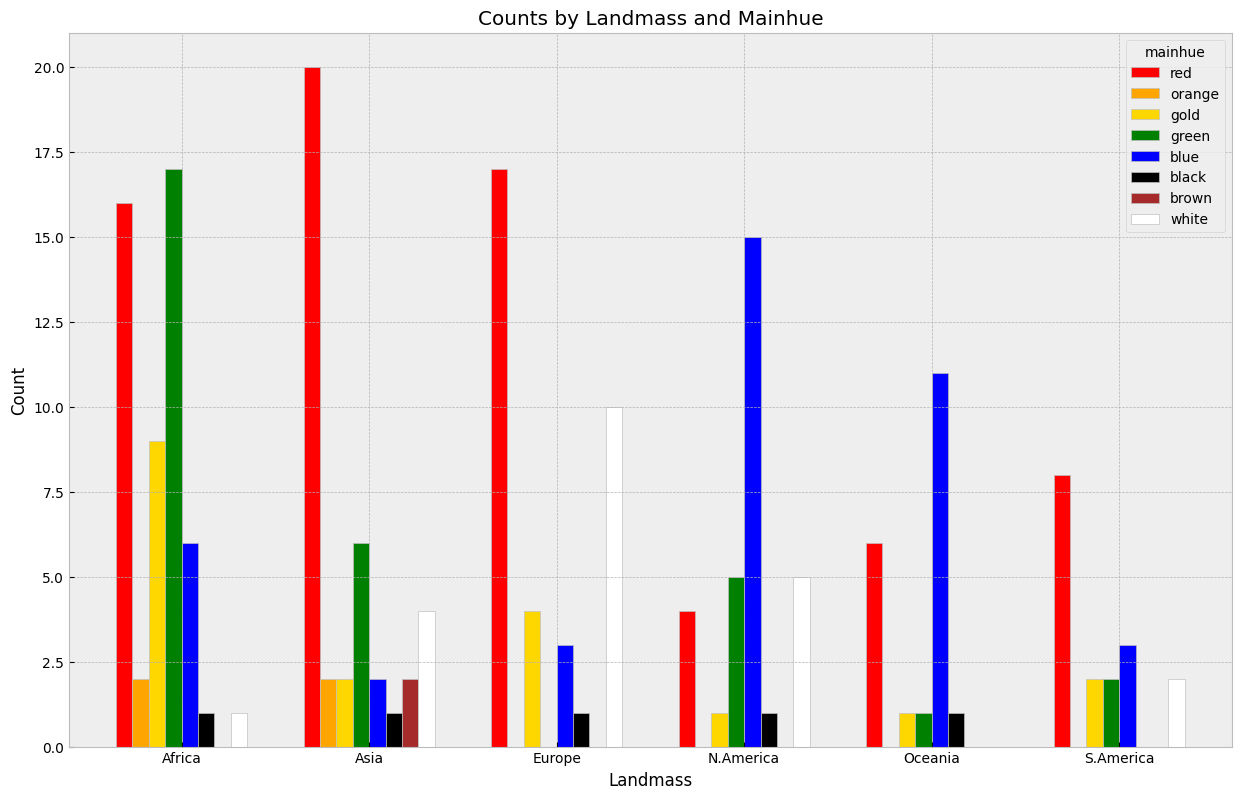

In [25]:
# let's plot the bar chart
phi = (1 + m.sqrt(5))/2    # golden ratio
a = 15
b = a/phi
c = .7
plt.style.use("bmh")
df_lmo.plot(kind='bar', 
                              figsize=(a, b),  
                              width=c, 
                              color=df_lmo.columns.values.tolist(), 
                              edgecolor='silver', 
                              title='Counts by Landmass and Mainhue', 
                              xlabel='Landmass', 
                              ylabel='Count', 
                              rot=0)

In [ ]:
plt.clf()
color_map_dict = {'red':'crimson', 'orange':'navajowhite', 'gold':'gold', 'green':'lightseagreen', 'blue':'dodgerblue', 'black':'black', 'brown':'darkgoldenrod', 'white':'white'}
colors = df_lmo.columns.values.tolist()
landmasses = df_lmo.index.tolist()
phi = (1 + m.sqrt(5))/2
fig_width = 15
fig_height = fig_width/phi
gen_font = 12
bar_width = .1
plt.style.use("bmh")
fig, ax = plt.subplots()
fig.set_size_inches([fig_width, fig_height])
x_tick_positions = []

for i, landmass in enumerate(landmasses):
    x_pos_offset = (len(colors) - 1) * bar_width / 2
    x_tick_positions.append(i + x_pos_offset)
    for j, color in enumerate(colors):
        value = df_lmo.loc[landmass, color]
        x_pos = i + j * bar_width
        if i == 0:
            ax.bar(x_pos, value, width=bar_width, color=color_map_dict[color], label=color, edgecolor='lightgray')
        else:
            ax.bar(x_pos, value, width=bar_width, color=color_map_dict[color], edgecolor='lightgray')
        if value != 0:
            ax.text(x_pos, value + 0.1, str(value), ha='center', fontsize=gen_font, color='darkslategray', weight = 'bold') # only label if value not zero

ax.set_xticks(x_tick_positions)
ax.set_xticklabels(landmasses, fontsize=gen_font)

font = fp()
font.set_weight('bold')
ax.tick_params(axis='y', labelsize=gen_font, color='darkslategray')
for label in ax.get_yticklabels():
    label.set_fontproperties(font)
# ax.yaxis.set_major_formatter(formatter)
ax.set_title('Counts by Landmass and Mainhue', fontsize=gen_font+5, fontweight="bold", color='darkslategray')
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
df_gr = df_lmo[['green','red']]
df_gr

In [ ]:
df_gr_colors = df_gr.columns.values.tolist()
df_gr_colors

In [ ]:
# Set theme
sns.set_theme(style="whitegrid")
# Create a custom color palette
pal = sns.color_palette("ch:s=.25,rot=-.25")[::-1]

# Sort the DataFrame by the 'red' column
df_lmo_sorted = df_lmo.sort_values(by='blue', ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots()
fig.set_size_inches([a/2,b/2])
ax.set_xticklabels(df_lmo_sorted.index, rotation=0, fontsize=10, color='midnightblue')

# Plot
sns.barplot(data=df_lmo_sorted, x=df_lmo_sorted.index, y=df_lmo_sorted['blue'], width=0.75, palette=pal)

ax.set_ylabel("# flags", fontsize=10, color = 'midnightblue', weight = 'bold')
ax.set_xlabel("Landmass", fontsize=10, color = 'midnightblue', weight = 'bold')
ax.set_title("Blue mainhue flags by landmass location", fontsize=10, weight = 'bold', color = 'midnightblue')

for y, value in enumerate(df_lmo_sorted['blue']):
    ax.text(y, value + 0.3, str(value), ha='center', fontsize=10, color='midnightblue', weight = 'bold')

# Add dotted horizontal grid lines
ax.yaxis.grid(True, linestyle='--')
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()